In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
df = pd.read_csv("train.csv");
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
df.shape

(42000, 785)

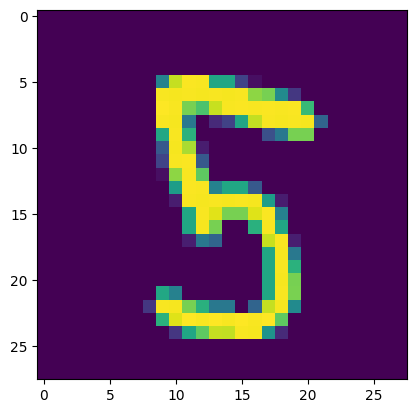

In [228]:
plt.imshow(df.iloc[18806, 1:].values.reshape(28, 28))

In [229]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [231]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [232]:
from sklearn.neighbors import KNeighborsClassifier

In [233]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [234]:
y_pred = knn.predict(X_test)

In [235]:
y_test.shape, y_pred.shape

((8400,), (8400,))

In [236]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

### This took a lot of time, look 18s
### Now lets reduce the columns using PCA and then check the accuracy

#### 1. Step one - Standardize the data

In [237]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [238]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### 2. Step two - PCA

In [239]:
from sklearn.decomposition import PCA

In [240]:
pca = PCA(n_components=100)

# n_components is the number of principle components you need. If given None, then the principle componenents will be equal to the no. of column

In [241]:
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.fit_transform(X_test)

In [242]:
X_train.shape, X_train_transformed.shape

((33600, 784), (33600, 100))

#### Look at the transformed one, columns are reduced to 100

In [243]:
knn = KNeighborsClassifier()

knn.fit(X_train_transformed, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [244]:
y_pred2 = knn.predict(X_test_transformed)

In [245]:
accuracy_score(y_test, y_pred2)

0.6421428571428571

In [247]:
for i in range(1, 785):
    pca = PCA(n_components=i)
    X_train_transformed = pca.fit_transform(X_train)
    X_test_transformed = pca.fit_transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_transformed, y_train)

    y_pred = knn.predict(X_test_transformed)

    print(accuracy_score(y_test, y_pred))

0.2538095238095238
0.32404761904761903
0.5045238095238095
0.6548809523809523
0.7228571428571429
0.8183333333333334
0.8354761904761905
0.8640476190476191
0.8766666666666667
0.7621428571428571
0.7729761904761905
0.7238095238095238
0.7229761904761904
0.6757142857142857
0.6866666666666666
0.6860714285714286
0.6788095238095239
0.6620238095238096
0.6394047619047619
0.6554761904761904
0.665
0.6715476190476191
0.6842857142857143
0.6691666666666667
0.6497619047619048


KeyboardInterrupt: 